In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
xls = pd.ExcelFile('C:\\Users\\Shreya Singh\\Downloads\\Girls in Data x BT Sport (Audience Data).xlsx')
df1 = pd.read_excel(xls, 'Audience Viewing Figures')
df2 = pd.read_excel(xls, 'Top Programmes')

In [4]:
df2.head()

,Date,Channel,Programme Title (Rights),Episode Title (Match),Start Time,End Time,Average Audience (000s)
0,2019-06-01,BT Sport 2,UEFA Champions League,Tottenham v Liverpool - Final,18:00:00,23:02:37,3321.7
1,2018-05-26,BT Sport 2,UEFA Champions League,Real Madrid v Liverpool - Final,18:59:00,22:45:28,3062.9
2,2017-05-24,BT Sport 2,UEFA Europa League,Ajax v Manchester United - Final,18:59:00,22:32:06,1870.1
3,2017-06-03,BT Sport 2,UEFA Champions League,Juventus v Real Madrid - Final,18:59:00,22:36:27,1751.4
4,2019-05-07,BT Sport 2,UEFA Champions League,"Liverpool v Barcelona - Semi Final, 2nd Leg",19:00:00,22:39:01,1721.9


In [5]:
df2.isnull().sum()

Date                        0
Channel                     0
Programme Title (Rights)    0
Episode Title (Match)       0
Start Time                  0
End Time                    0
Average Audience (000s)     0
dtype: int64

In [46]:
temp1=df2.drop(['Date','Channel','Episode Title (Match)','Start Time','End Time'],axis=1)
prog=temp1.groupby(['Programme Title (Rights)']).sum()
prog

,Average Audience (000s)
Programme Title (Rights),
Premier League,8316.1
UEFA Champions League,31441.3
UEFA Europa League,3362.0
UEFA Super Cup,1158.5


In [50]:
temp2=df2.drop(['Date','Programme Title (Rights)','Episode Title (Match)','Start Time','End Time'],axis=1)
top_channel=temp2.groupby(['Channel']).sum()
top_channel

,Average Audience (000s)
Channel,
BT Sport 1,9778.6
BT Sport 2,34499.3


In [23]:
df1.columns

Index(['Season', 'Year', 'Month', 'BT Sport 1', 'BT Sport 2', 'BT Sport 3',
       'BT Sport/ESPN', 'BTS TOTAL'],
      dtype='object')

In [24]:
df1.head()

,Season,Year,Month,BT Sport 1,BT Sport 2,BT Sport 3,BT Sport/ESPN,BTS TOTAL
0,2016/17,2016,August,14.5,16.0,1.3,1.1,32.9
1,2016/17,2016,September,22.0,20.2,8.8,3.1,54.2
2,2016/17,2016,October,23.2,18.0,5.1,3.4,49.7
3,2016/17,2016,November,23.4,20.5,9.4,4.2,57.5
4,2016/17,2016,December,31.2,12.0,6.7,2.5,52.4


In [37]:
temp3=df1.drop(['Season','Month','BT Sport 1','BT Sport 2','BT Sport 3','BT Sport/ESPN'],axis=1)
year_audience=temp3.groupby(['Year']).sum()
year_audience

,BTS TOTAL
Year,
2016,246.7
2017,625.3
2018,655.3
2019,646.4
2020,366.3


In [31]:
temp3=df1.drop(['Season','Year','BT Sport 1','BT Sport 2','BT Sport 3','BT Sport/ESPN'],axis=1)
temp4=temp3.groupby(['Month']).sum()
temp4

,BTS TOTAL
Month,
April,237.2
August,224.1
December,261.2
February,265.2
January,271.1
July,67.1
June,107.2
March,210.7
May,208.4


In [289]:
gud=temp4.copy()
gud.reset_index(inplace=True)

#rowindices = [3,1,2]
#gud = gud.sort_values(by="Month")
gud

,Month,BTS TOTAL
0,April,237.2
1,August,224.1
2,December,261.2
3,February,265.2
4,January,271.1
5,July,67.1
6,June,107.2
7,March,210.7
8,May,208.4
9,November,254.6


Text(0, 0.5, 'Audience Viewing figures')

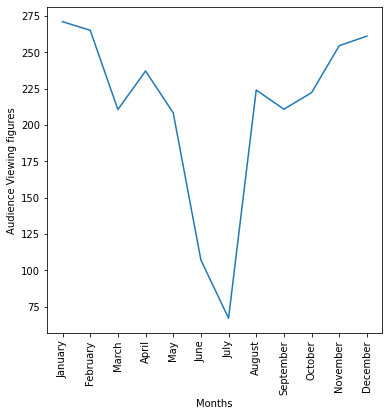

In [291]:
gud1.set_index(['Month'],inplace=True)
plt.figure(figsize=(6,6))
plt.plot(gud1)
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Months')
plt.ylabel('Audience Viewing figures')

In [290]:
rowindices=[4,3,7,0,8,6,5,1,11,10,9,2]

gud1 = gud.iloc[rowindices,:]
gud1

,Month,BTS TOTAL
4,January,271.1
3,February,265.2
7,March,210.7
0,April,237.2
8,May,208.4
6,June,107.2
5,July,67.1
1,August,224.1
11,September,210.9
10,October,222.3


In [282]:
gud.columns

Index(['BTS TOTAL'], dtype='object')

In [36]:
temp5=df1.drop(['Season','Month','BTS TOTAL'],axis=1)
chan1=temp5.groupby(['Year']).sum()
chan1

,BT Sport 1,BT Sport 2,BT Sport 3,BT Sport/ESPN
Year,,,,
2016,114.3,86.7,31.3,14.3
2017,277.4,265.9,52.2,29.8
2018,270.3,294.4,69.4,21.0
2019,215.1,313.1,94.2,24.1
2020,247.8,84.4,27.1,6.6


Text(0, 0.5, 'Audience Viewing figures')

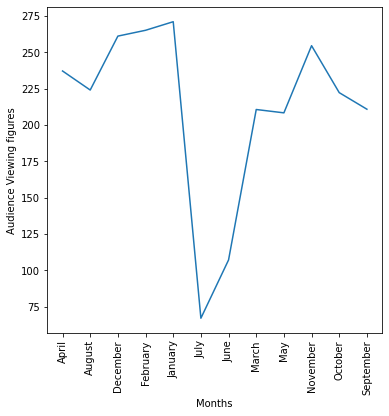

In [43]:
plt.figure(figsize=(6,6))
plt.plot(temp4)
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Months')
plt.ylabel('Audience Viewing figures')

Text(0, 0.5, 'Audience Viewing figures')

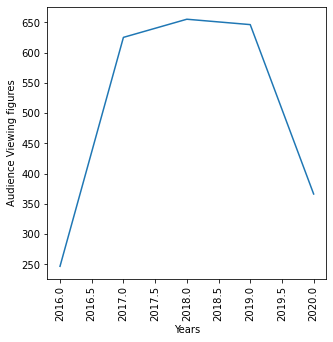

In [45]:
plt.figure(figsize=(5,5))
plt.plot(year_audience)
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Years')
plt.ylabel('Audience Viewing figures')

Text(0, 0.5, 'Average Audience')

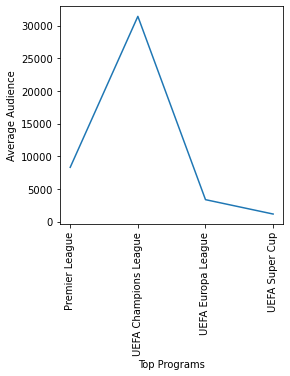

In [49]:
plt.figure(figsize=(4,4))
plt.plot(prog)
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Top Programs')
plt.ylabel('Average Audience')

Text(0, 0.5, 'Average Audience')

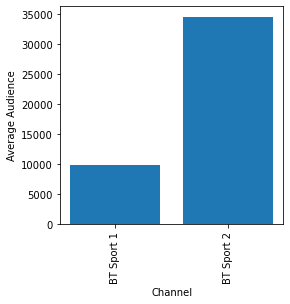

In [206]:
plt.figure(figsize=(4,4))
plt.bar(top_channel.index,top_channel['Average Audience (000s)'])
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Channel')
plt.ylabel('Average Audience')

In [61]:
top_channel

,Average Audience (000s)
Channel,
BT Sport 1,9778.6
BT Sport 2,34499.3


In [62]:
top_channel.index

Index(['BT Sport 1', 'BT Sport 2'], dtype='object', name='Channel')

In [139]:
df3 = pd.read_excel(xls, 'Demographics')

In [141]:
df3

,Unnamed: 0,2016/17,Unnamed: 2,Unnamed: 3,Unnamed: 4,2016/17.1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Channel Group ...,All,Men,Women,NaN,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
1,BT Sport 1,19.2,14,5.3,NaN,1.1,1.1,2.2,2.8,3.4,3.5,3.6,1.5
2,BT Sport 2,21.1,15,6,NaN,1,1.3,2.9,3.3,4.1,3.5,3.2,1.6
3,BT Sport 3,4.7,3.4,1.3,NaN,0.3,0.4,0.5,0.6,0.9,0.8,0.8,0.4
4,BT Sport/ESPN,2.3,1.6,0.6,NaN,0.1,0.1,0.2,0.5,0.5,0.4,0.4,0.1
5,Total,47.3,34.1,13.2,NaN,2.5,2.9,5.8,7.2,9,8.3,8,3.5
6,NaN,NaN,0.72093,0.27907,NaN,0.0528541,0.0613108,0.122622,0.15222,0.190275,0.175476,0.169133,0.0739958
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2017/18,NaN,NaN,NaN,2017/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Channel Group ...,All,Men,Women,NaN,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+


In [148]:
df3.drop(['Unnamed: 4'], axis=1,inplace=True)

In [149]:
df3.columns=['2016-17','All','Men','Women','Kids 4-15','Adults 16-24','Adults 25-34','Adults 35-44','Adults 45-54','Adults 55-64','Adults 65-74','Adults 75+']

In [150]:
temp_2016=df3.loc[1:6]
temp_2016.columns=['2016-17','All','Men','Women','Kids 4-15','Adults 16-24','Adults 25-34','Adults 35-44','Adults 45-54','Adults 55-64','Adults 65-74','Adults 75+']

In [151]:
temp_2016.fillna(0)

,2016-17,All,Men,Women,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
1,BT Sport 1,19.2,14.00000,5.30000,1.100000,1.100000,2.200000,2.80000,3.400000,3.500000,3.600000,1.500000
2,BT Sport 2,21.1,15.00000,6.00000,1.000000,1.300000,2.900000,3.30000,4.100000,3.500000,3.200000,1.600000
3,BT Sport 3,4.7,3.40000,1.30000,0.300000,0.400000,0.500000,0.60000,0.900000,0.800000,0.800000,0.400000
4,BT Sport/ESPN,2.3,1.60000,0.60000,0.100000,0.100000,0.200000,0.50000,0.500000,0.400000,0.400000,0.100000
5,Total,47.3,34.10000,13.20000,2.500000,2.900000,5.800000,7.20000,9.000000,8.300000,8.000000,3.500000
6,0,0.0,0.72093,0.27907,0.052854,0.061311,0.122622,0.15222,0.190275,0.175476,0.169133,0.073996


In [152]:
temp_2017=df3.loc[10:15]
temp_2017.columns=['2016-17','All','Men','Women','Kids 4-15','Adults 16-24','Adults 25-34','Adults 35-44','Adults 45-54','Adults 55-64','Adults 65-74','Adults 75+']
t=temp_2017.fillna(0)
t

,2016-17,All,Men,Women,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
10,BT Sport 1,23.7,17.500000,6.200000,1.300000,1.500000,2.100000,3.300000,4.300000,4.300000,4.400000,2.400000
11,BT Sport 2,24.5,17.700000,6.800000,1.300000,1.800000,2.800000,3.500000,4.500000,4.300000,4.100000,2.200000
12,BT Sport 3,4.7,3.500000,1.300000,0.300000,0.400000,0.500000,0.600000,0.900000,0.800000,0.900000,0.500000
13,BT Sport/ESPN,2.2,1.700000,0.500000,0.100000,0.100000,0.200000,0.500000,0.500000,0.300000,0.300000,0.100000
14,Total,55.2,40.400000,14.800000,3.000000,3.700000,5.600000,7.900000,10.200000,9.700000,9.800000,5.300000
15,0,0.0,0.731884,0.268116,0.054348,0.067029,0.101449,0.143116,0.184783,0.175725,0.177536,0.096014


In [153]:
temp_2018=df3.loc[19:24]
temp_2018.columns=['2016-17','All','Men','Women','Kids 4-15','Adults 16-24','Adults 25-34','Adults 35-44','Adults 45-54','Adults 55-64','Adults 65-74','Adults 75+']
t1=temp_2018.fillna(0)

In [154]:
temp_2019=df3.loc[28:33]
temp_2019.columns=['2016-17','All','Men','Women','Kids 4-15','Adults 16-24','Adults 25-34','Adults 35-44','Adults 45-54','Adults 55-64','Adults 65-74','Adults 75+']
t2=temp_2019.fillna(0)

In [156]:
t['All'] = t['All'].astype(float)
t1['All'] = t1['All'].astype(float)
t2['All'] = t2['All'].astype(float)
t['Men'] = t['Men'].astype(float)
t1['Men'] = t1['Men'].astype(float)
t2['Men'] = t2['Men'].astype(float)
t['Women'] = t['Women'].astype(float)
t['Kids 4-15'] = t['Kids 4-15'].astype(float)
t['Adults 16-24'] = t['Adults 16-24'].astype(float)
t['Adults 25-34'] = t['Adults 25-34'].astype(float)
t['Adults 35-44'] = t['Adults 35-44'].astype(float)
t['Adults 65-74'] = t['Adults 65-74'].astype(float)
t['Adults 75+'] = t['Adults 75+'].astype(float)
t1['Women'] = t1['Women'].astype(float)
t1['Kids 4-15'] = t1['Kids 4-15'].astype(float)
t1['Adults 16-24'] = t1['Adults 16-24'].astype(float)
t1['Adults 25-34'] = t1['Adults 25-34'].astype(float)
t1['Adults 35-44'] = t1['Adults 35-44'].astype(float)
t1['Adults 65-74'] = t1['Adults 65-74'].astype(float)
t1['Adults 75+'] = t1['Adults 75+'].astype(float)
t2['Women'] = t2['Women'].astype(float)
t2['Kids 4-15'] = t2['Kids 4-15'].astype(float)
t2['Adults 16-24'] = t2['Adults 16-24'].astype(float)
t2['Adults 25-34'] = t2['Adults 25-34'].astype(float)
t2['Adults 35-44'] = t2['Adults 35-44'].astype(float)
t2['Adults 65-74'] = t2['Adults 65-74'].astype(float)
t2['Adults 75+'] = t2['Adults 75+'].astype(float)

In [155]:
t

,2016-17,All,Men,Women,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
10,BT Sport 1,23.7,17.500000,6.200000,1.300000,1.500000,2.100000,3.300000,4.300000,4.300000,4.400000,2.400000
11,BT Sport 2,24.5,17.700000,6.800000,1.300000,1.800000,2.800000,3.500000,4.500000,4.300000,4.100000,2.200000
12,BT Sport 3,4.7,3.500000,1.300000,0.300000,0.400000,0.500000,0.600000,0.900000,0.800000,0.900000,0.500000
13,BT Sport/ESPN,2.2,1.700000,0.500000,0.100000,0.100000,0.200000,0.500000,0.500000,0.300000,0.300000,0.100000
14,Total,55.2,40.400000,14.800000,3.000000,3.700000,5.600000,7.900000,10.200000,9.700000,9.800000,5.300000
15,0,0.0,0.731884,0.268116,0.054348,0.067029,0.101449,0.143116,0.184783,0.175725,0.177536,0.096014


In [157]:
t.dtypes

2016-17          object
All             float64
Men             float64
Women           float64
Kids 4-15       float64
Adults 16-24    float64
Adults 25-34    float64
Adults 35-44    float64
Adults 45-54    float64
Adults 55-64    float64
Adults 65-74    float64
Adults 75+      float64
dtype: object

In [158]:
t1

,2016-17,All,Men,Women,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
19,BT Sport 1,21.2,15.500000,5.700000,1.000000,1.400000,2.200000,2.70000,4.000000,4.100000,3.700000,2.200000
20,BT Sport 2,26.6,18.800000,7.800000,1.300000,1.500000,3.000000,3.50000,5.200000,5.200000,4.300000,2.500000
21,BT Sport 3,7.7,5.500000,2.100000,0.400000,0.400000,0.700000,1.00000,1.500000,1.600000,1.300000,0.700000
22,BT Sport/ESPN,1.9,1.500000,0.400000,0.100000,0.100000,0.200000,0.30000,0.400000,0.400000,0.200000,0.100000
23,Total,57.3,41.200000,16.100000,2.900000,3.400000,6.100000,7.50000,11.100000,11.300000,9.500000,5.500000
24,0,0.0,0.719023,0.280977,0.050611,0.059337,0.106457,0.13089,0.193717,0.197208,0.165794,0.095986


Text(0, 0.5, 'Audience-(2017-18)')

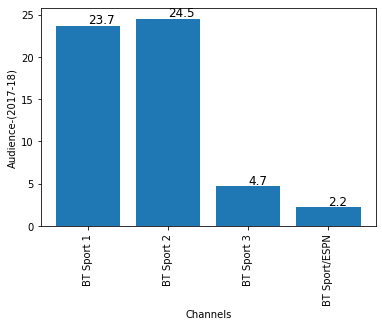

In [202]:
plt.figure(figsize=(6,4))
plt.bar(t.loc[10:13,'2016-17'],t.loc[10:13,'All'])
for index,data in enumerate(t.loc[10:13,'All']):
    plt.text(x=index , y =data+.28 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Channels')
plt.ylabel('Audience-(2017-18)')

In [111]:
t.loc[10:12,:]

,2016-17,All,Men,Women,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
10,BT Sport 1,23.7,17.5,6.2,1.3,1.5,2.1,3.3,4.3,4.3,4.4,2.4
11,BT Sport 2,24.5,17.7,6.8,1.3,1.8,2.8,3.5,4.5,4.3,4.1,2.2
12,BT Sport 3,4.7,3.5,1.3,0.3,0.4,0.5,0.6,0.9,0.8,0.9,0.5


In [112]:
t.loc[10:12,'2016-17']

10    BT Sport 1
11    BT Sport 2
12    BT Sport 3
Name: 2016-17, dtype: object

In [115]:
t.loc[10:12,'All']

10    23.7
11    24.5
12     4.7
Name: All, dtype: float64

Text(0, 0.5, 'Audience-(2018-19)')

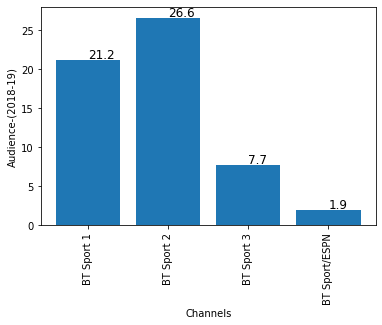

In [192]:
plt.figure(figsize=(6,4))
plt.bar(t1.loc[19:22,'2016-17'],t1.loc[19:22,'All'])
for index,data in enumerate(t1.loc[19:22,'All']):
    plt.text(x=index , y =data+.18 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Channels')
plt.ylabel('Audience-(2018-19)')

In [163]:
t2

,2016-17,All,Men,Women,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
28,BT Sport 1,27.4,20.000000,7.400000,1.600000,1.800000,3.500000,3.400000,5.400000,5.400000,4.000000,2.200000
29,BT Sport 2,13.4,9.600000,3.900000,0.700000,0.700000,1.500000,1.700000,2.700000,2.700000,2.200000,1.200000
30,BT Sport 3,5.3,3.900000,1.400000,0.300000,0.300000,0.600000,0.600000,1.000000,1.100000,0.900000,0.400000
31,BT Sport/ESPN,1.5,1.100000,0.300000,0.100000,0.100000,0.100000,0.300000,0.300000,0.300000,0.200000,0.100000
32,Total,47.6,34.600000,13.000000,2.700000,2.900000,5.700000,6.100000,9.300000,9.600000,7.300000,3.900000
33,0,0.0,0.726891,0.273109,0.056723,0.060924,0.119748,0.128151,0.195378,0.201681,0.153361,0.081933


Text(0, 0.5, 'Audience-(2019-20)')

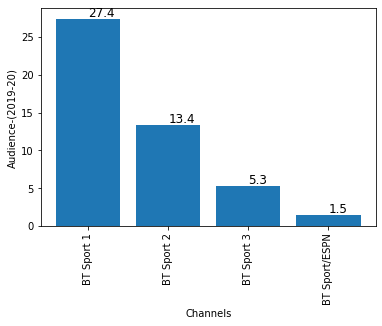

In [201]:
plt.figure(figsize=(6,4))
plt.bar(t2.loc[28:31,'2016-17'],t2.loc[28:31,'All'])
for index,data in enumerate(t2.loc[28:31,'All']):
    plt.text(x=index , y =data+0.28 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Channels')
plt.ylabel('Audience-(2019-20)')

In [276]:
temp_2019=df3.loc[1:4]
temp_2019.columns=['2016-17','All','Men','Women','Kids 4-15','Adults 16-24','Adults 25-34','Adults 35-44','Adults 45-54','Adults 55-64','Adults 65-74','Adults 75+']
t4=temp_2019.fillna(0)
t4

,2016-17,All,Men,Women,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
1,BT Sport 1,19.2,14.0,5.3,1.1,1.1,2.2,2.8,3.4,3.5,3.6,1.5
2,BT Sport 2,21.1,15.0,6.0,1.0,1.3,2.9,3.3,4.1,3.5,3.2,1.6
3,BT Sport 3,4.7,3.4,1.3,0.3,0.4,0.5,0.6,0.9,0.8,0.8,0.4
4,BT Sport/ESPN,2.3,1.6,0.6,0.1,0.1,0.2,0.5,0.5,0.4,0.4,0.1


In [277]:
t4['All'] = t4['All'].astype(float)
t4['Men'] = t4['Men'].astype(float)
t4['Women'] = t4['Women'].astype(float)
t4['Kids 4-15'] = t4['Kids 4-15'].astype(float)
t4['Adults 16-24'] = t4['Adults 16-24'].astype(float)
t4['Adults 25-34'] = t4['Adults 25-34'].astype(float)
t4['Adults 35-44'] = t4['Adults 35-44'].astype(float)
t4['Adults 45-54'] = t4['Adults 45-54'].astype(float)
t4['Adults 55-64'] = t4['Adults 55-64'].astype(float)
t4['Adults 65-74'] = t4['Adults 65-74'].astype(float)
t4['Adults 75+'] = t4['Adults 75+'].astype(float)

Text(0, 0.5, 'Audience-(2016-17)')

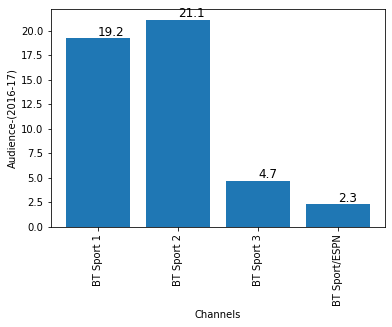

In [278]:
plt.figure(figsize=(6,4))
plt.bar(t4.loc[1:4,'2016-17'],t4.loc[1:4,'All'])
for index,data in enumerate(t4.loc[1:4,'All']):
    plt.text(x=index , y =data+0.28 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('Channels')
plt.ylabel('Audience-(2016-17)')

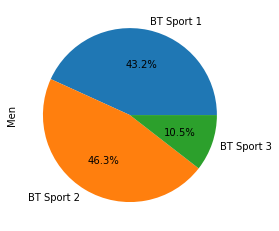

In [211]:
t4['Men'].plot.pie(autopct="%.1f%%")

In [210]:
t4.set_index('2016-17',inplace=True)

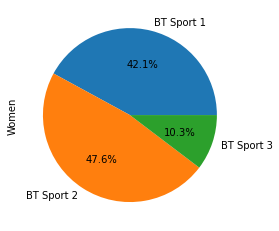

In [212]:
t4['Women'].plot.pie(autopct="%.1f%%")

In [222]:
#M_W=t4.loc[1:3]
m=t4.drop(['All','Men','Women'],axis=1)
m=m.T

In [223]:
m

2016-17,BT Sport 1,BT Sport 2,BT Sport 3
Kids 4-15,1.1,1.0,0.3
Adults 16-24,1.1,1.3,0.4
Adults 25-34,2.2,2.9,0.5
Adults 35-44,2.8,3.3,0.6
Adults 45-54,3.4,4.1,0.9
Adults 55-64,3.5,3.5,0.8
Adults 65-74,3.6,3.2,0.8
Adults 75+,1.5,1.6,0.4


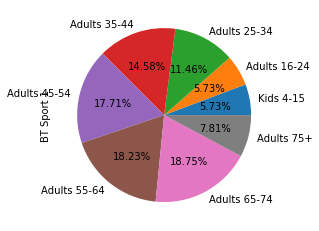

In [225]:
m['BT Sport 1'].plot.pie(autopct="%.2f%%")

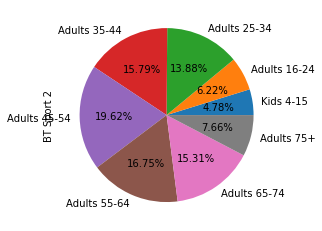

In [226]:
m['BT Sport 2'].plot.pie(autopct="%.2f%%")

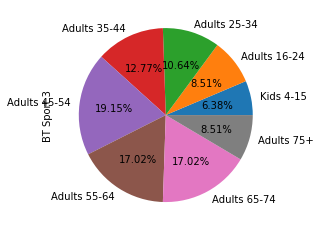

In [227]:
m['BT Sport 3'].plot.pie(autopct="%.2f%%")

In [232]:
m1=t4[['Men','Women']]
m1=m1.T

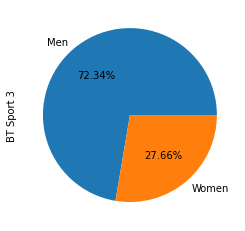

In [234]:
m1['BT Sport 3'].plot.pie(autopct="%.2f%%")

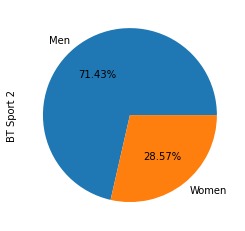

In [235]:
m1['BT Sport 2'].plot.pie(autopct="%.2f%%")

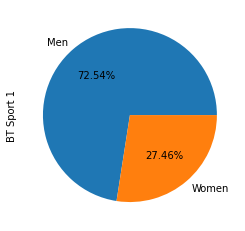

In [236]:
m1['BT Sport 1'].plot.pie(autopct="%.2f%%")

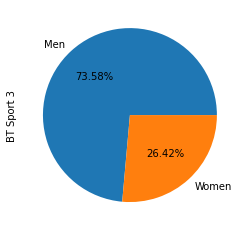

In [247]:
n['BT Sport 3'].plot.pie(autopct="%.2f%%")

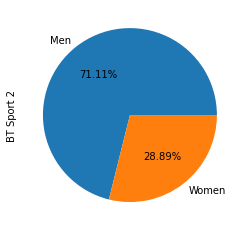

In [246]:
n['BT Sport 2'].plot.pie(autopct="%.2f%%")

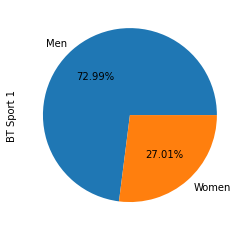

In [245]:
n['BT Sport 1'].plot.pie(autopct="%.2f%%")

In [253]:
n2=t4.drop(['All','Men','Women'],axis=1)
n2=n2.T

In [260]:
t2.set_index('2016-17',inplace=True)
n2=t2.drop(['All','Men','Women'],axis=1)

n3['BT Sport 3'].plot.pie(autopct="%.2f%%")

KeyError: "None of ['2016-17'] are in the columns"

In [258]:
t2

,All,Men,Women,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
2016-17,,,,,,,,,,,
BT Sport 1,27.4,20.000000,7.400000,1.600000,1.800000,3.500000,3.400000,5.400000,5.400000,4.000000,2.200000
BT Sport 2,13.4,9.600000,3.900000,0.700000,0.700000,1.500000,1.700000,2.700000,2.700000,2.200000,1.200000
BT Sport 3,5.3,3.900000,1.400000,0.300000,0.300000,0.600000,0.600000,1.000000,1.100000,0.900000,0.400000
BT Sport/ESPN,1.5,1.100000,0.300000,0.100000,0.100000,0.100000,0.300000,0.300000,0.300000,0.200000,0.100000
Total,47.6,34.600000,13.000000,2.700000,2.900000,5.700000,6.100000,9.300000,9.600000,7.300000,3.900000
0,0.0,0.726891,0.273109,0.056723,0.060924,0.119748,0.128151,0.195378,0.201681,0.153361,0.081933


In [261]:
t2.T

2016-17,BT Sport 1,BT Sport 2,BT Sport 3,BT Sport/ESPN,Total,0
All,27.4,13.4,5.3,1.5,47.6,0.000000
Men,20.0,9.6,3.9,1.1,34.6,0.726891
Women,7.4,3.9,1.4,0.3,13.0,0.273109
Kids 4-15,1.6,0.7,0.3,0.1,2.7,0.056723
Adults 16-24,1.8,0.7,0.3,0.1,2.9,0.060924
Adults 25-34,3.5,1.5,0.6,0.1,5.7,0.119748
Adults 35-44,3.4,1.7,0.6,0.3,6.1,0.128151
Adults 45-54,5.4,2.7,1.0,0.3,9.3,0.195378
Adults 55-64,5.4,2.7,1.1,0.3,9.6,0.201681
Adults 65-74,4.0,2.2,0.9,0.2,7.3,0.153361


In [263]:
t2.index

Index(['BT Sport 1', 'BT Sport 2', 'BT Sport 3', 'BT Sport/ESPN', 'Total', 0], dtype='object', name='2016-17')

In [264]:
t2.reset_index()

,2016-17,All,Men,Women,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
0,BT Sport 1,27.4,20.000000,7.400000,1.600000,1.800000,3.500000,3.400000,5.400000,5.400000,4.000000,2.200000
1,BT Sport 2,13.4,9.600000,3.900000,0.700000,0.700000,1.500000,1.700000,2.700000,2.700000,2.200000,1.200000
2,BT Sport 3,5.3,3.900000,1.400000,0.300000,0.300000,0.600000,0.600000,1.000000,1.100000,0.900000,0.400000
3,BT Sport/ESPN,1.5,1.100000,0.300000,0.100000,0.100000,0.100000,0.300000,0.300000,0.300000,0.200000,0.100000
4,Total,47.6,34.600000,13.000000,2.700000,2.900000,5.700000,6.100000,9.300000,9.600000,7.300000,3.900000
5,0,0.0,0.726891,0.273109,0.056723,0.060924,0.119748,0.128151,0.195378,0.201681,0.153361,0.081933


In [266]:
n2=t2.drop(['All','Men','Women'],axis=1)

In [267]:
n2 

,Kids 4-15,Adults 16-24,Adults 25-34,Adults 35-44,Adults 45-54,Adults 55-64,Adults 65-74,Adults 75+
2016-17,,,,,,,,
BT Sport 1,1.600000,1.800000,3.500000,3.400000,5.400000,5.400000,4.000000,2.200000
BT Sport 2,0.700000,0.700000,1.500000,1.700000,2.700000,2.700000,2.200000,1.200000
BT Sport 3,0.300000,0.300000,0.600000,0.600000,1.000000,1.100000,0.900000,0.400000
BT Sport/ESPN,0.100000,0.100000,0.100000,0.300000,0.300000,0.300000,0.200000,0.100000
Total,2.700000,2.900000,5.700000,6.100000,9.300000,9.600000,7.300000,3.900000
0,0.056723,0.060924,0.119748,0.128151,0.195378,0.201681,0.153361,0.081933


In [269]:
n3=n2.T

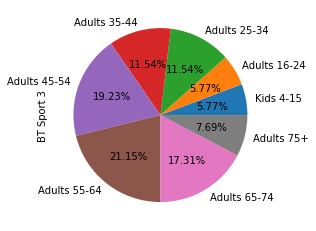

In [270]:
n3['BT Sport 3'].plot.pie(autopct="%.2f%%")

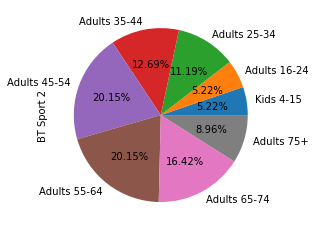

In [271]:
n3['BT Sport 2'].plot.pie(autopct="%.2f%%")

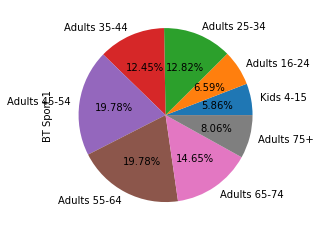

In [272]:
n3['BT Sport 1'].plot.pie(autopct="%.2f%%")

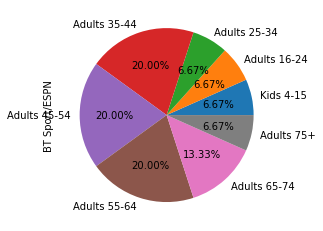

In [273]:
n3['BT Sport/ESPN'].plot.pie(autopct="%.2f%%")